# Exploratory Data Analysis of Various IDS Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

## Function to load and describe a dataset

In [2]:
def load_and_describe(dataset_path, label_column):
    files = glob(os.path.join(dataset_path, '*.csv'))
    df_list = []
    for file in files:
        try:
            df_list.append(pd.read_csv(file, encoding='latin1', low_memory=False)) # Try reading with latin1 encoding
        except Exception as e:
            print(f"Error reading {file}: {e}")
    if not df_list:
        print(f"No CSV files found or could be read in {dataset_path}")
        return None
    df = pd.concat(df_list, ignore_index=True)
    df.columns = df.columns.str.strip() # Strip whitespace from column names
    print(f"Loaded {len(df)} rows from {dataset_path}")
    print("First few rows of the dataframe:")
    print(df.head())
    print("Dataframe info:")
    print(df.info())
    print("Statistical summary of the dataframe:")
    print(df.describe())
    
    plt.figure(figsize=(12, 6))
    # Check if label_column exists before plotting
    if label_column in df.columns:
        sns.countplot(y=df[label_column], order = df[label_column].value_counts().index)
        plt.title(f'{os.path.basename(dataset_path)} - Label Distribution')
        plt.show()
    else:
        print(f"Label column '{label_column}' not found in the dataframe.")
    
    # Convert all columns to numeric for correlation matrix, coercing errors
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    # Drop columns that are all NaN after coercion (i.e., non-numeric columns)
    df_numeric = df_numeric.dropna(axis=1, how='all')
    df_numeric = df_numeric.dropna(axis=1, how='all')
    
    plt.figure(figsize=(20, 15))
    sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm') # annot=False for large matrices
    plt.title(f'{os.path.basename(dataset_path)} - Correlation Matrix')
    plt.show()
    
    return df

# 1. WEB IDS23

Loaded 12059749 rows from Datasets/WEB-IDS23
First few rows of the dataframe:
                    uid                             ts       id.orig_h  \
0  a_Can0Xe4lKBZjnhkbRf  2023-07-08 23:06:57.493245952  192.168.100.23   
1  a_Cn4jOM163xG1F8Z2Mj  2023-07-08 23:06:57.526097920  192.168.100.23   
2   a_CxQEWfoDKHWnoodUa  2023-07-08 23:06:57.526170112  192.168.100.23   
3   a_C3fRf2aFaE7HHGH6i  2023-07-08 23:06:57.526271232  192.168.100.23   
4  a_C5LRTv3ExWRd7eYHL7  2023-07-08 23:06:57.833542144  192.168.100.23   

         id.resp_h service  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0  192.168.100.218     ssl       1.944112          33.0          29.0   
1  192.168.100.218     ssl       1.911198          50.0          45.0   
2  192.168.100.218     ssl       1.911320          26.0          28.0   
3  192.168.100.218     ssl       1.911190          33.0          33.0   
4  192.168.100.218     ssl       1.604048          18.0          15.0   

   fwd_data_pkts_tot  bwd_data_pkts_to

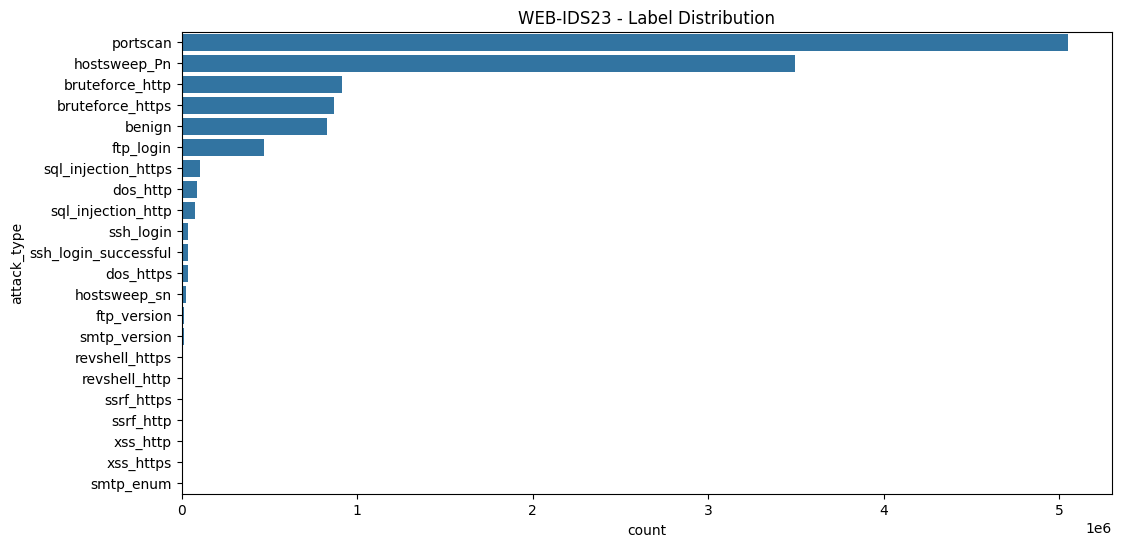

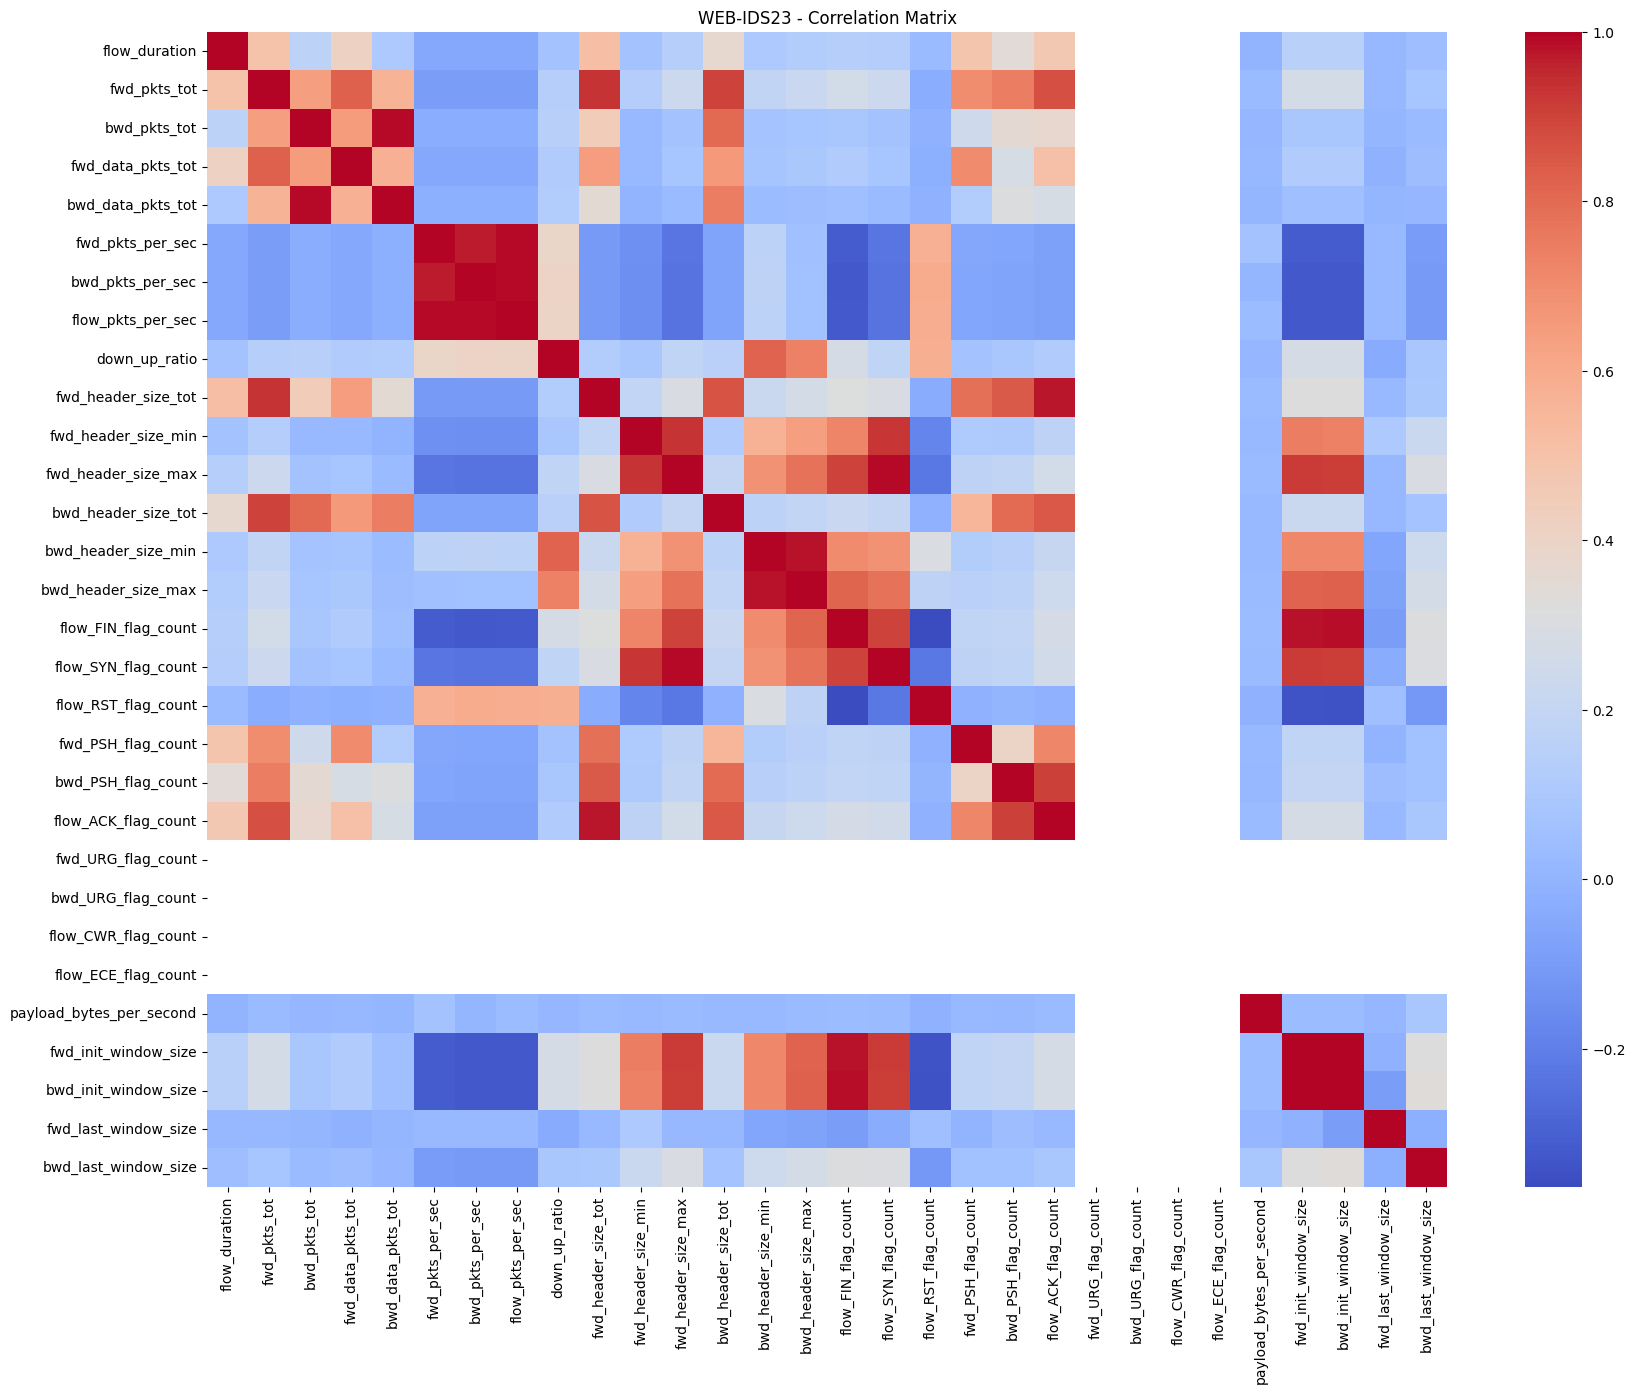

In [3]:
df_web_ids23 = load_and_describe('Datasets/WEB-IDS23', 'attack_type')

# 2. 5G NIDD

Loaded 728316 rows from Datasets/5G NIDD/BS1_each_attack_csv
First few rows of the dataframe:
     SrcId  Rank StartTime LastTime  Trans        Flgs  Seq       Dur  \
0  0.0.0.0     1   54:12.6  54:12.6      1   e            1  0.000000   
1  0.0.0.0     2   54:13.0  54:13.1      1   e            2  0.076555   
2  0.0.0.0     3   54:13.1  54:13.2      1   e            3  0.142887   
3  0.0.0.0     4   54:13.6  54:13.6      1   e            4  0.000000   
4  0.0.0.0     5   54:13.8  54:18.8      1   e            5  4.999971   

    RunTime    IdleTime  ...    SrcTCPBase    DstTCPBase  TcpRtt  SynAck  \
0  0.000000  1663055744  ...           NaN           NaN     0.0     0.0   
1  0.076555  1663055744  ...  3.657878e+09  1.228624e+09     0.0     0.0   
2  0.142887  1663055744  ...           NaN           NaN     0.0     0.0   
3  0.000000  1663055744  ...           NaN           NaN     0.0     0.0   
4  4.999971  1663055744  ...           NaN           NaN     0.0     0.0   

   AckDat 

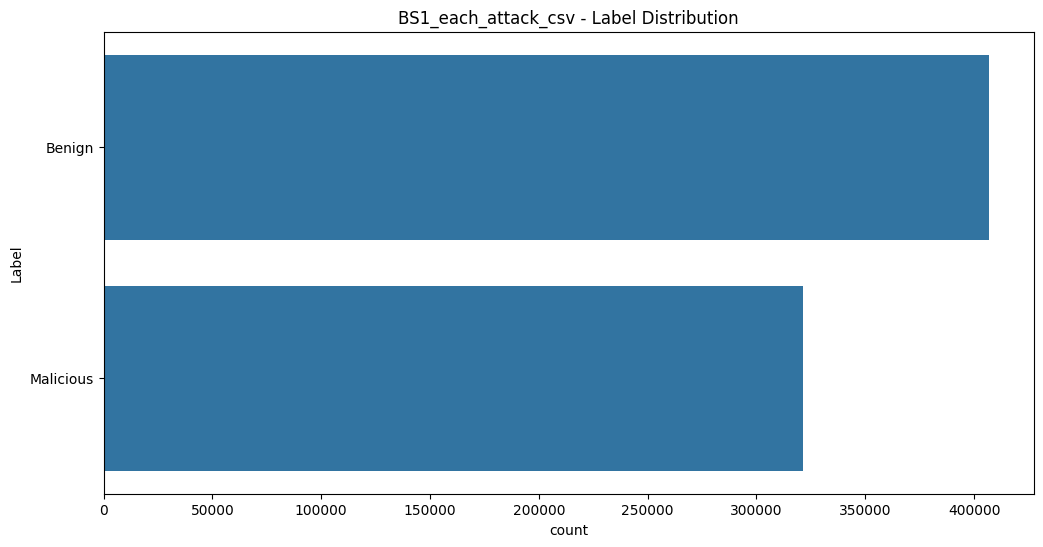

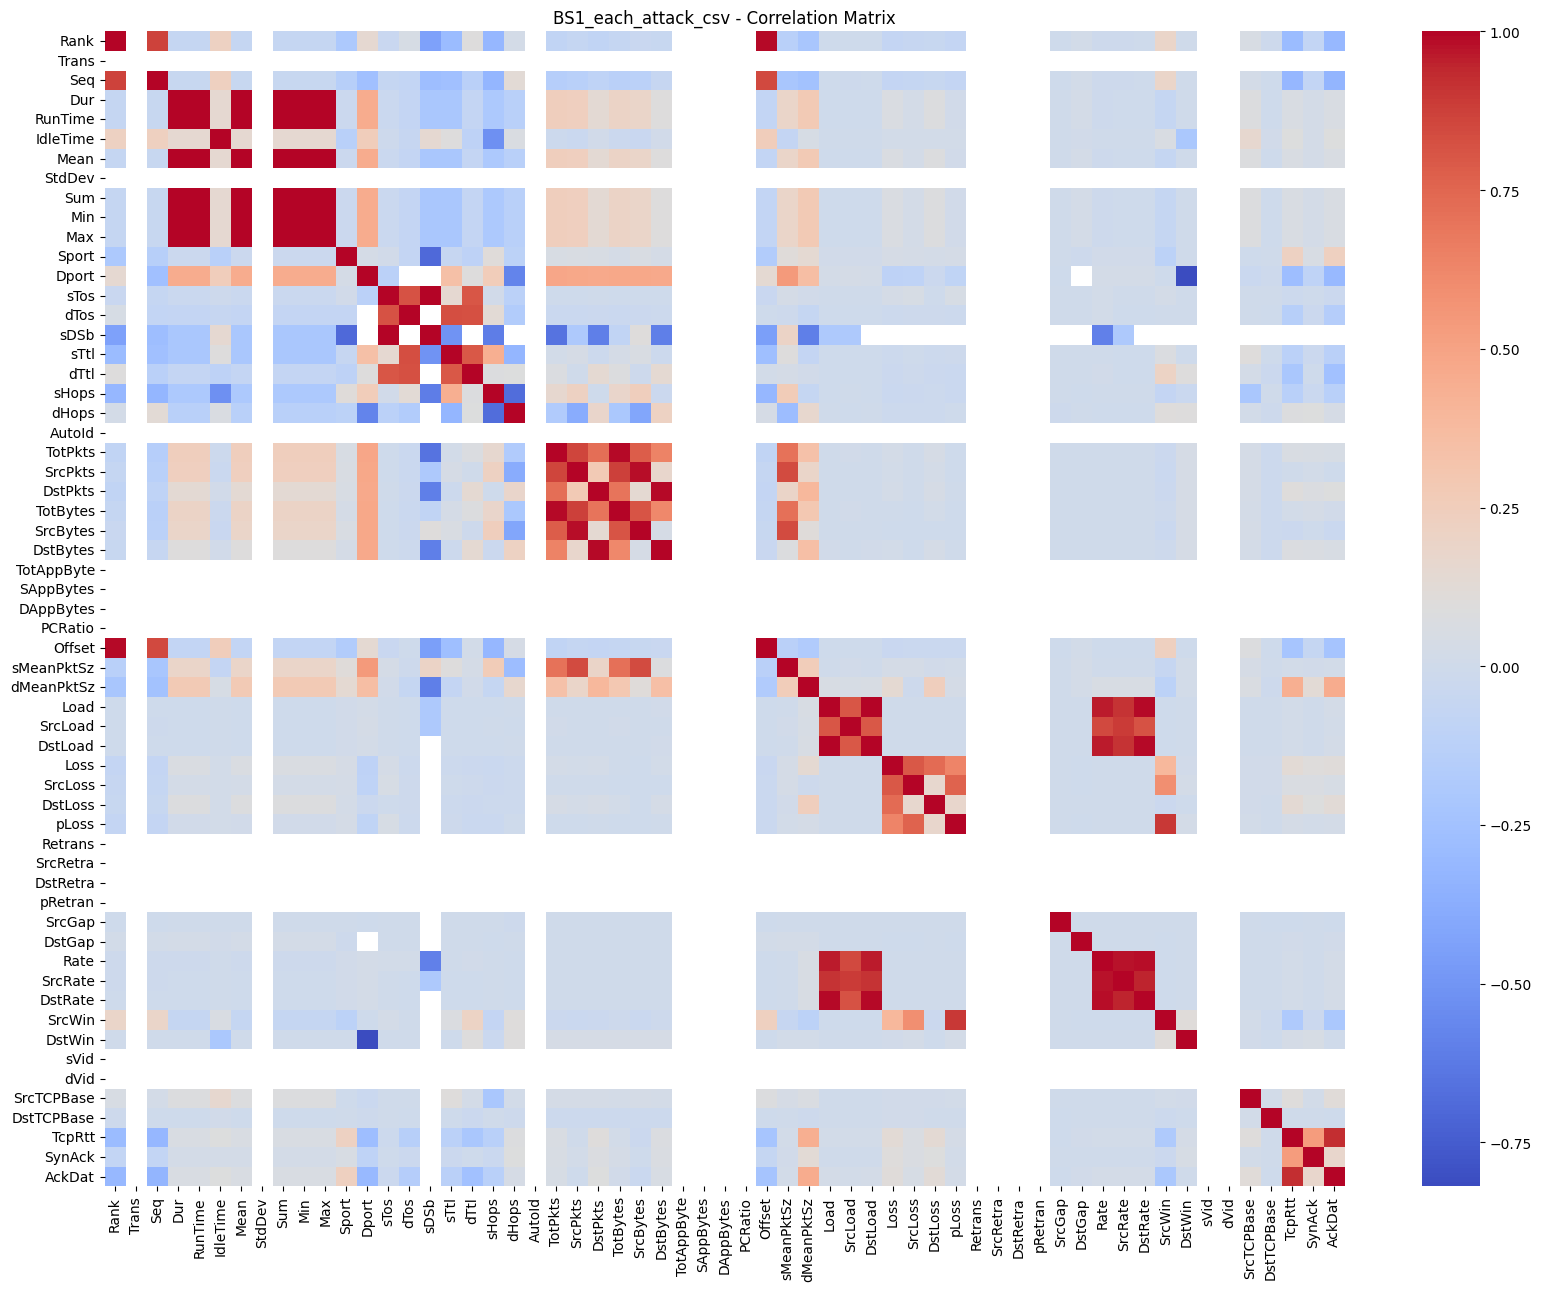

In [4]:
df_5g_nidd = load_and_describe('Datasets/5G NIDD/BS1_each_attack_csv', 'Label')

# 3. CIC-IDS17

Loaded 2830743 rows from Datasets/CIC-IDS17
First few rows of the dataframe:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                22            166                  1                       1   
1             60148             83                  1                       2   
2               123          99947                  1                       1   
3               123          37017                  1                       1   
4                 0      111161336                147                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                            0                            0   
1                            0                            0   
2                           48                           48   
3                           48                           48   
4                            0                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Pack

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


       Destination Port  Flow Duration  Total Fwd Packets  \
count      2.830743e+06   2.830743e+06       2.830743e+06   
mean       8.071483e+03   1.478566e+07       9.361160e+00   
std        1.828363e+04   3.365374e+07       7.496728e+02   
min        0.000000e+00  -1.300000e+01       1.000000e+00   
25%        5.300000e+01   1.550000e+02       2.000000e+00   
50%        8.000000e+01   3.131600e+04       2.000000e+00   
75%        4.430000e+02   3.204828e+06       5.000000e+00   
max        6.553500e+04   1.200000e+08       2.197590e+05   

       Total Backward Packets  Total Length of Fwd Packets  \
count            2.830743e+06                 2.830743e+06   
mean             1.039377e+01                 5.493024e+02   
std              9.973883e+02                 9.993589e+03   
min              0.000000e+00                 0.000000e+00   
25%              1.000000e+00                 1.200000e+01   
50%              2.000000e+00                 6.200000e+01   
75%             

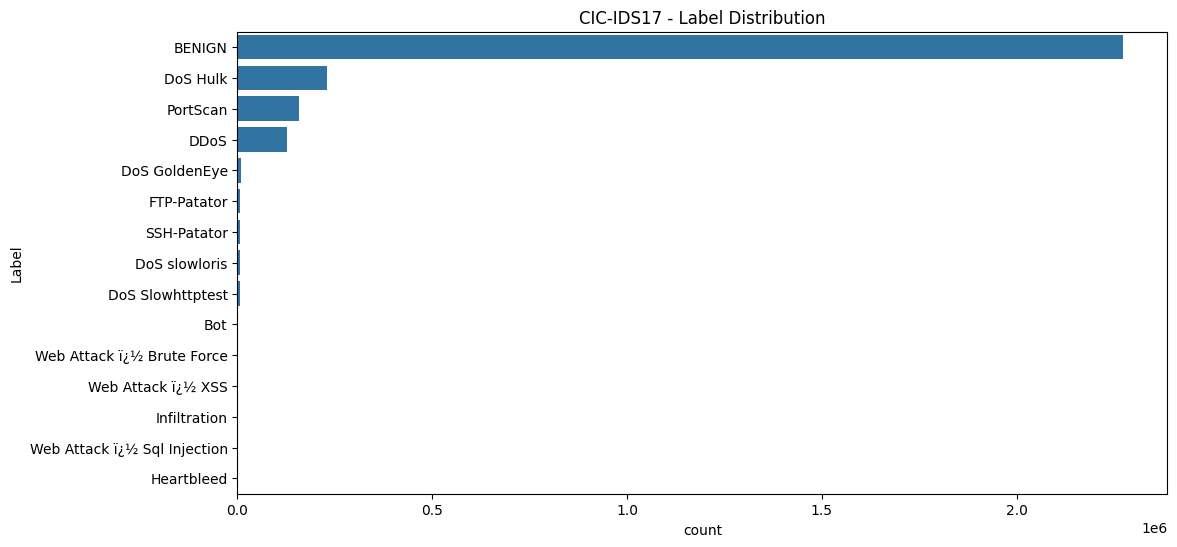

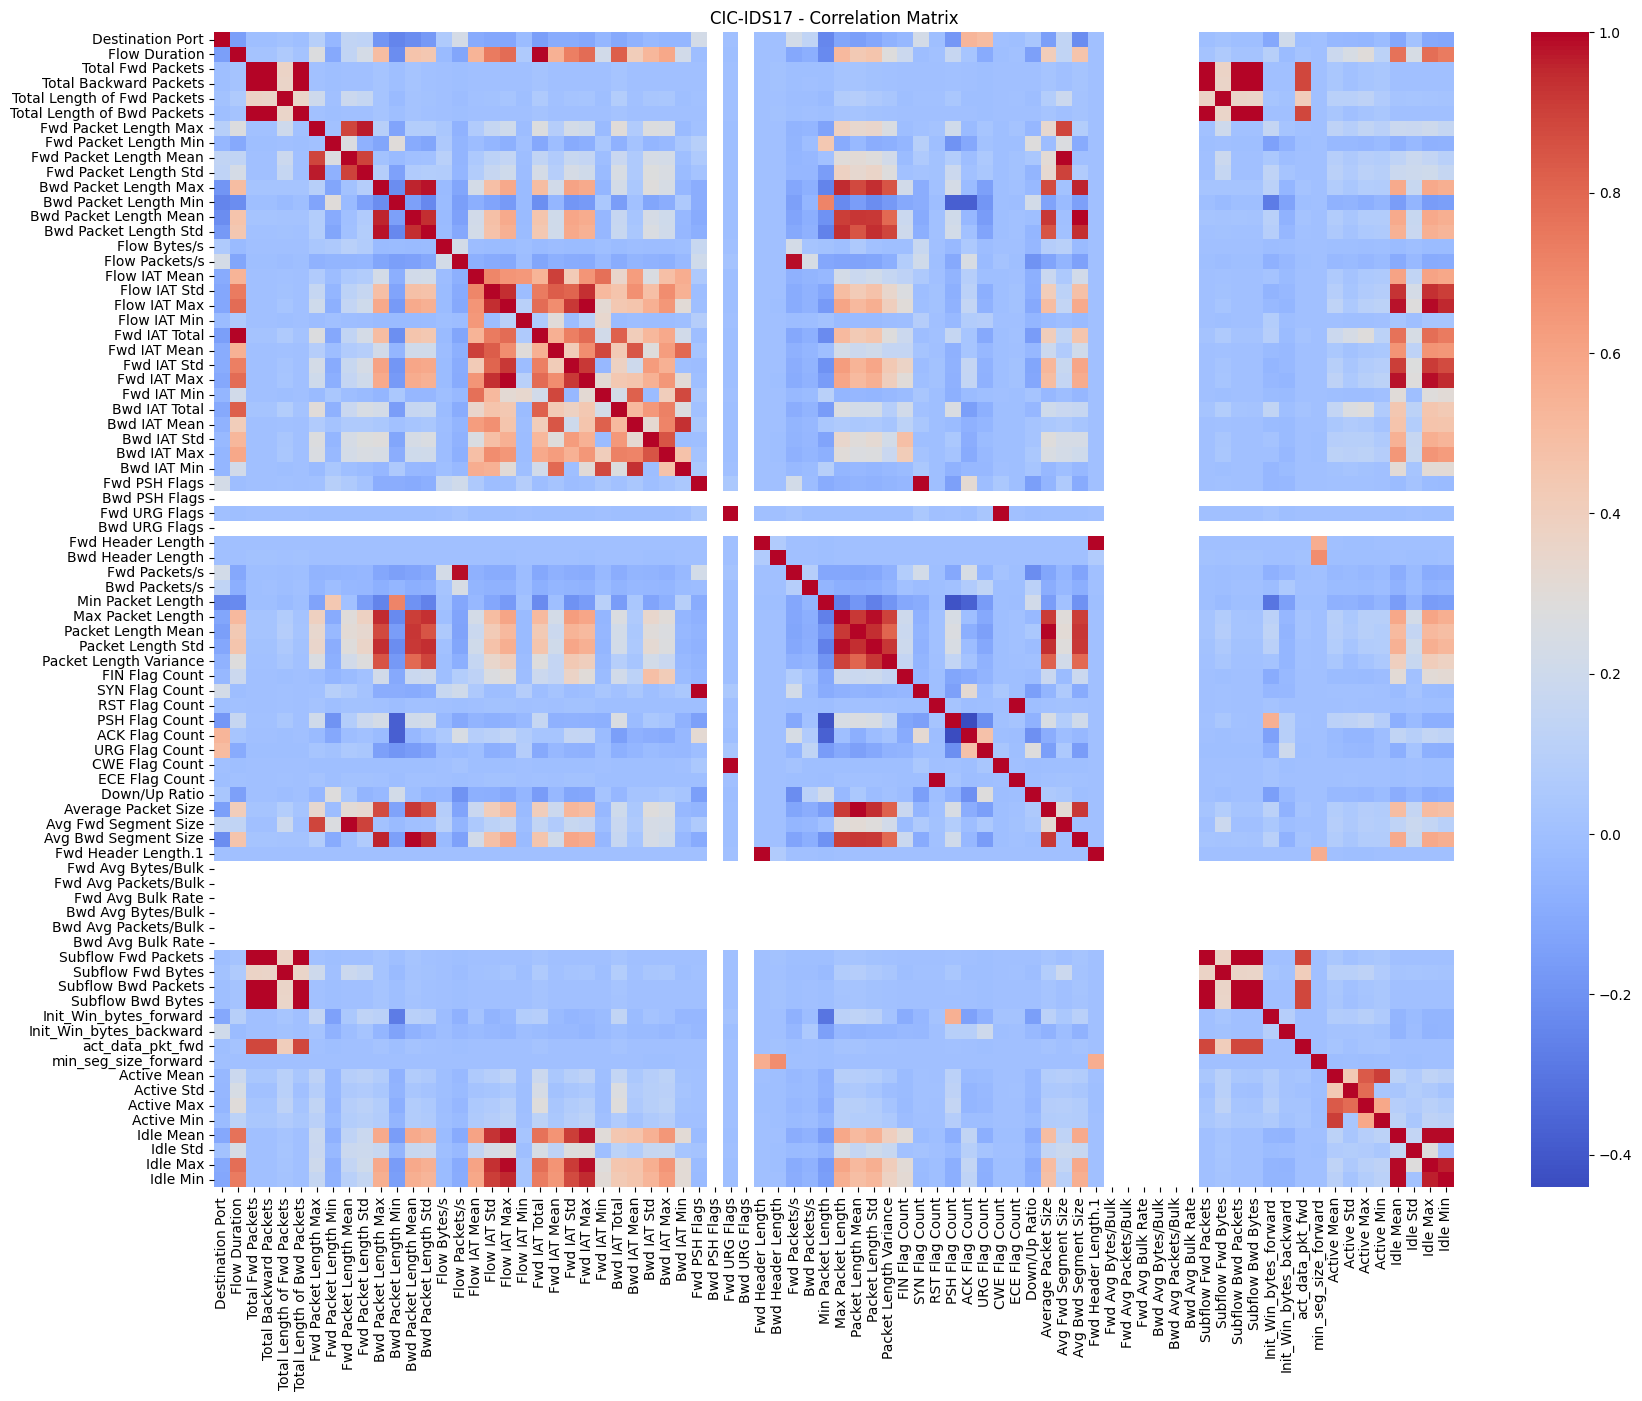

In [5]:
df_cic_ids17 = load_and_describe('Datasets/CIC-IDS17', 'Label')

# 4. CSE-CIC-IDS2018

Loaded 16233002 rows from Datasets/CSE-CIC-IDS2018
First few rows of the dataframe:
  Dst Port Protocol            Timestamp Flow Duration Tot Fwd Pkts  \
0        0        0  14/02/2018 08:31:01     112641719            3   
1        0        0  14/02/2018 08:33:50     112641466            3   
2        0        0  14/02/2018 08:36:39     112638623            3   
3       22        6  14/02/2018 08:40:13       6453966           15   
4       22        6  14/02/2018 08:40:23       8804066           14   

  Tot Bwd Pkts TotLen Fwd Pkts TotLen Bwd Pkts Fwd Pkt Len Max  \
0            0               0               0               0   
1            0               0               0               0   
2            0               0               0               0   
3           10            1239            2273             744   
4           11            1143            2209             744   

  Fwd Pkt Len Min  ... Active Min   Idle Mean    Idle Std  Idle Max  Idle Min  \
0          

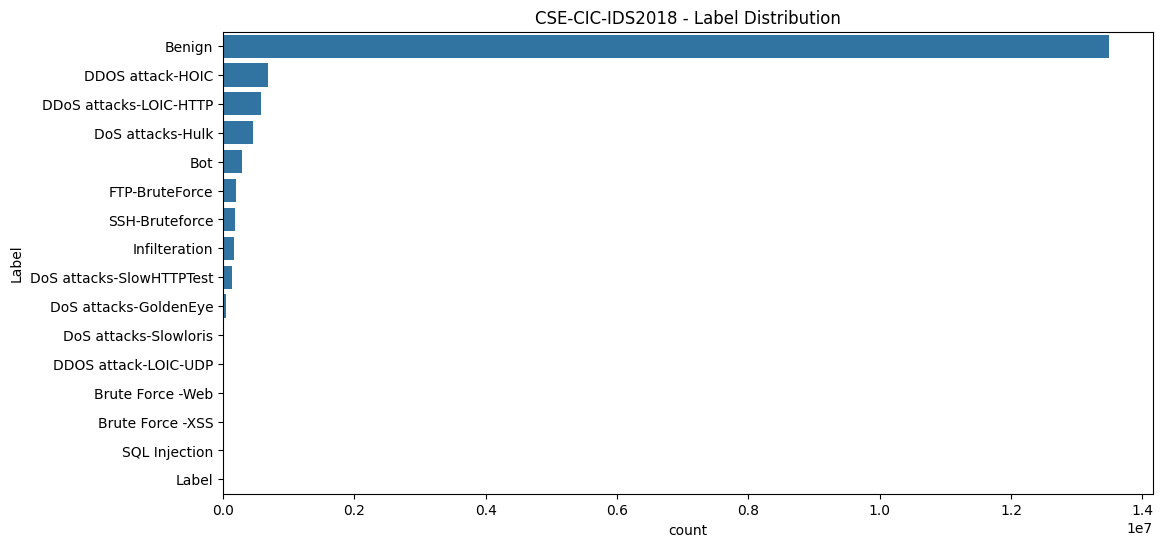

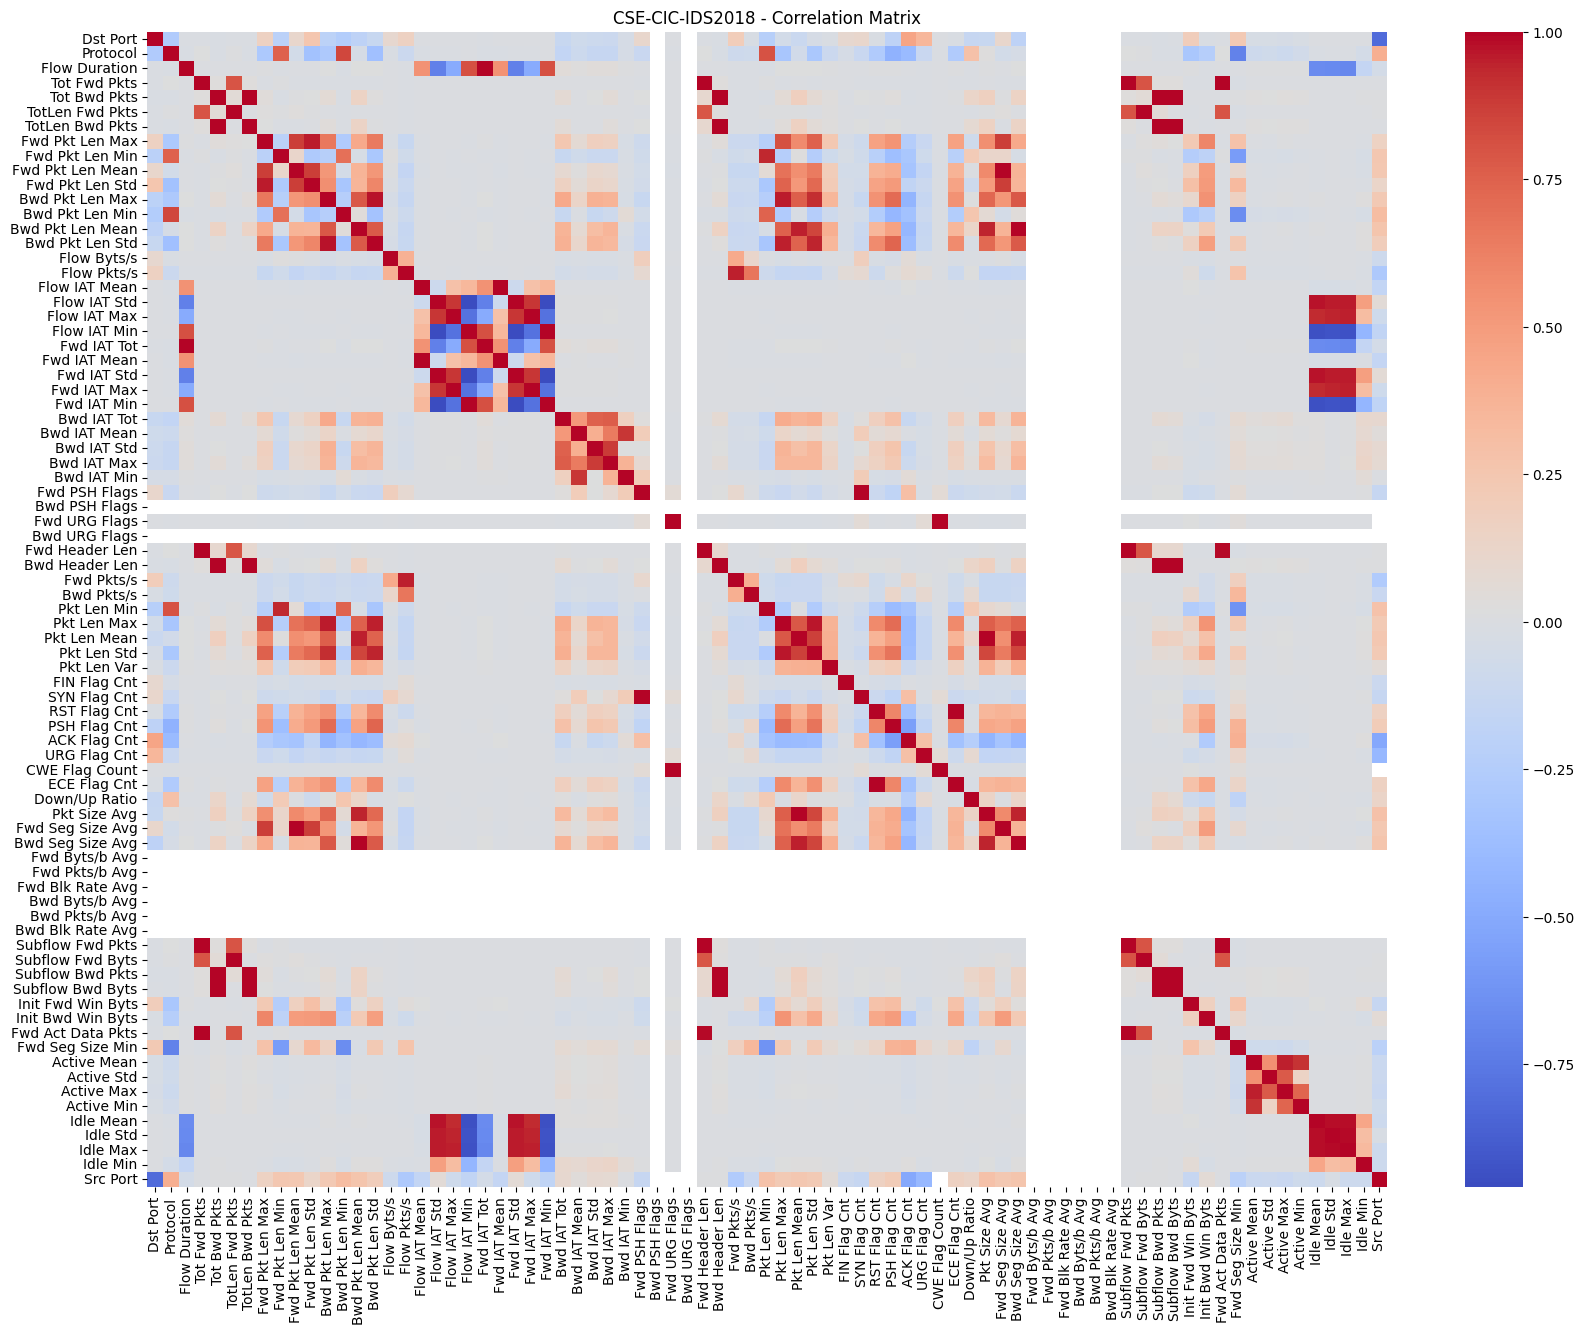

In [6]:
df_cse_cic_ids2018 = load_and_describe('Datasets/CSE-CIC-IDS2018', 'Label')

# 5. UNSW_NB15

Loaded 2797973 rows from Datasets/UNSW_NB15
First few rows of the dataframe:
       59.166.0.1    18247  149.171.126.4   7662  tcp  FIN  0.119596     4550  \
0      59.166.0.3  54771.0  149.171.126.2  27709  tcp  FIN  0.650574   8928.0   
1      59.166.0.8  13289.0  149.171.126.9   5190  tcp  FIN  0.007980   2158.0   
2  149.171.126.18   1043.0   175.45.176.3     53  udp  INT  0.000005    264.0   
3  149.171.126.18   1043.0   175.45.176.3     53  udp  INT  0.000005    264.0   
4      59.166.0.3  10275.0  149.171.126.0     25  tcp  FIN  0.486578  37462.0   

    68342    31  ...  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm ct_srv_dst  \
0   320.0  31.0  ...         NaN               NaN         NaN        NaN   
1  2464.0  31.0  ...         NaN               NaN         NaN        NaN   
2     0.0  60.0  ...         NaN               NaN         NaN        NaN   
3     0.0  60.0  ...         NaN               NaN         NaN        NaN   
4  3380.0  31.0  ...         NaN               NaN 

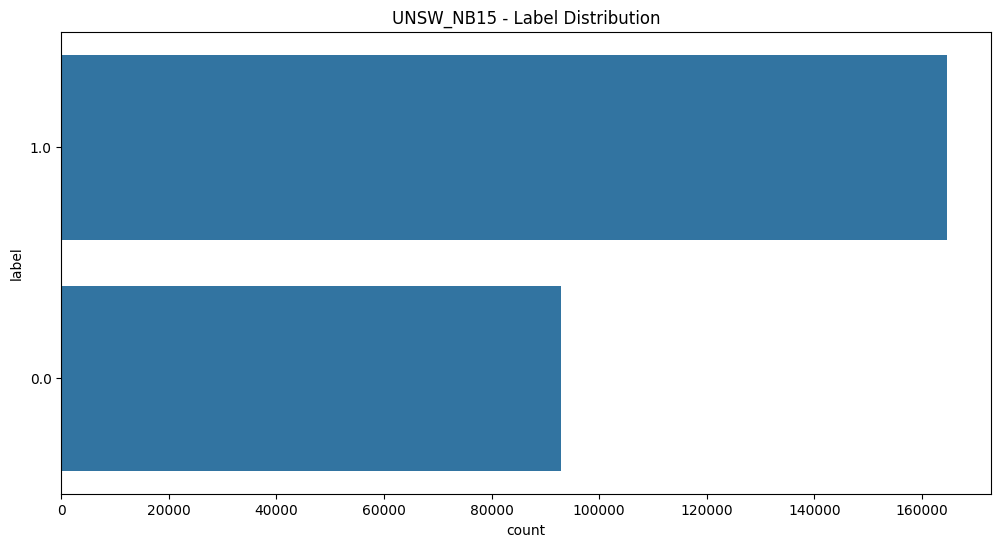

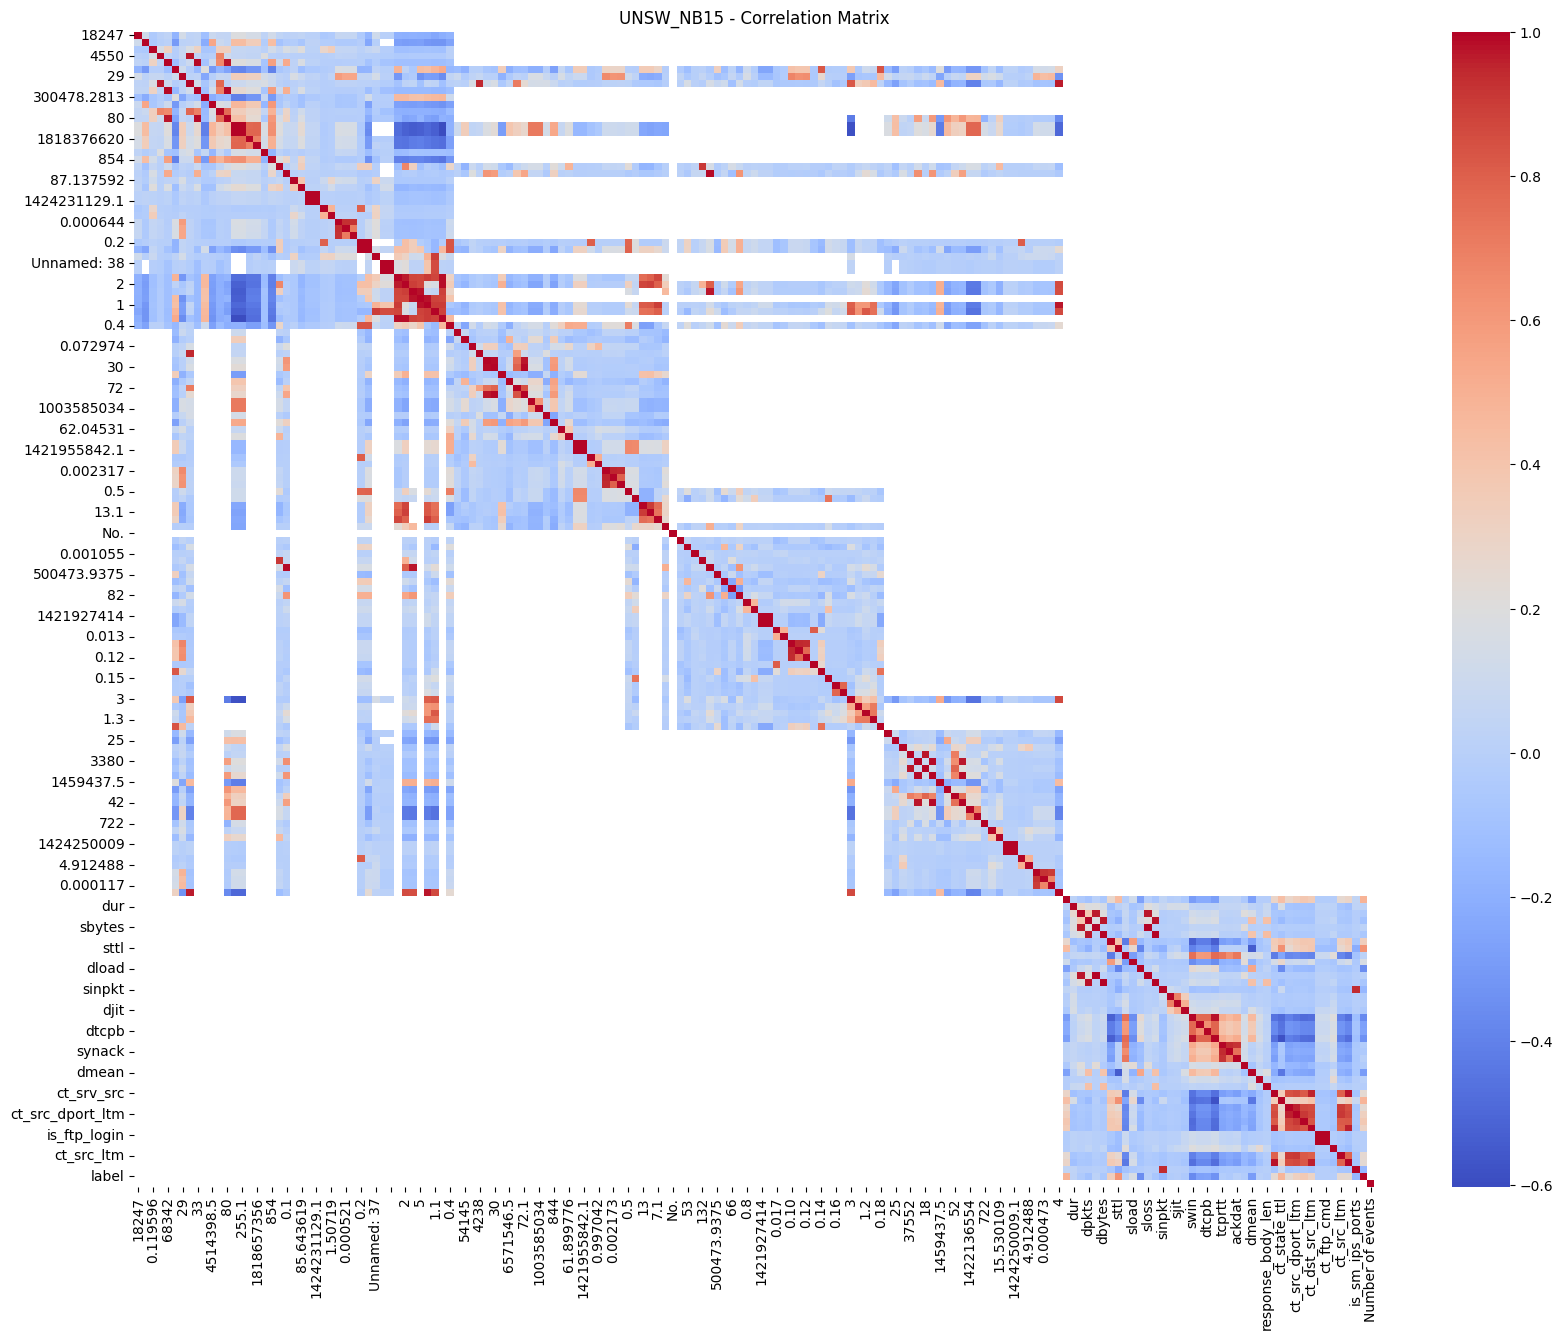

In [7]:
df_unsw_nb15 = load_and_describe('Datasets/UNSW_NB15', 'label')